# 문서 유사도 (Document Similarity)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os, glob

path = 'C:/encore-skn11/07_NLP/01_text_analysis/data/OpinosisDataset1.0/topics'
all_files = glob.glob(os.path.join(path, '*.data'))

filename_list = []
opinions_list = []

for file_ in all_files:
    df = pd.read_table(file_, header=None, index_col=None, encoding='latin1')
    # display(df)

    # 파일명
    filename = file_.split('/')[-1]
    filename = filename.split(',')[0]
    filename_list.append(filename)

    # 의견 내용
    opinions = df.to_string(index=False, header=False)
    opinions_list.append(opinions) 

document_df = pd.DataFrame({
    'filename': filename_list,
    'opinions': opinions_list
})

In [5]:
import string
import nltk
from nltk.stem import WordNetLemmatizer

def lemmatize(text):
    # 소문자 변환
    text = text.lower()

    # 특수문자 변환(제거)
    punc_rem_dict = dict((ord(ch), None) for ch in string.punctuation)
    text = text.translate(punc_rem_dict)

    # 토큰화
    tokens = nltk.word_tokenize(text)

    # 어근 분리
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token, pos='v') for token in tokens]


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    tokenizer=lemmatize,
    stop_words='english',
    ngram_range=(1, 2),
    max_df=0.85,
    min_df=0.05
)

opinions_vecs = tfidf_vectorizer.fit_transform(document_df['opinions'])

c:\Users\maest\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\maest\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['make'] not in stop_words.
  warnings.warn(


In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, max_iter=5000, random_state=0)
document_df['cluster'] = kmeans.fit_predict(opinions_vecs)
document_df

,filename,opinions,cluster
0,topics\accuracy_garmin_nuvi_255W_gps.txt.data,...,2
1,topics\bathroom_bestwestern_hotel_sfo.txt.data,...,1
2,topics\battery-life_amazon_kindle.txt.data,...,0
3,topics\battery-life_ipod_nano_8gb.txt.data,...,2
4,topics\battery-life_netbook_1005ha.txt.data,...,2
5,topics\buttons_amazon_kindle.txt.data,...,0
6,topics\comfort_honda_accord_2008.txt.data,...,3
7,topics\comfort_toyota_camry_2007.txt.data,...,3
8,topics\directions_garmin_nuvi_255W_gps.txt.data,...,2
9,topics\display_garmin_nuvi_255W_gps.txt.data,...,2


In [9]:
hotel_index = document_df[document_df['cluster'] == 1].index
print(hotel_index.shape)
print(hotel_index)

base_index = 1
document_df.iloc[base_index]

(15,)
Index([1, 13, 14, 15, 20, 21, 24, 30, 31, 32, 38, 39, 40, 45, 46], dtype='int64')


filename       topics\bathroom_bestwestern_hotel_sfo.txt.data
opinions                                                  ...
cluster                                                     1
Name: 1, dtype: object

In [11]:
from sklearn.metrics.pairwise import cosine_similarity

print(opinions_vecs[base_index].shape, opinions_vecs.shape)
opinions_sim = cosine_similarity(opinions_vecs[base_index], opinions_vecs)
opinions_sim

(1, 4072) (51, 4072)


array([[0.00748211, 1.        , 0.00929825, 0.0057907 , 0.00951122,
        0.01189862, 0.04207734, 0.05068772, 0.00883856, 0.00840561,
        0.01333684, 0.0118808 , 0.01204711, 0.04527121, 0.05728026,
        0.06248841, 0.00753869, 0.02152493, 0.01696471, 0.02047214,
        0.06173425, 0.06124276, 0.00748295, 0.00877269, 0.04074639,
        0.01315832, 0.0105536 , 0.0222888 , 0.11626805, 0.00537765,
        0.41683399, 0.36028138, 0.51119681, 0.00799792, 0.01306653,
        0.01888393, 0.02248538, 0.01884263, 0.11499329, 0.15210166,
        0.1506946 , 0.04685638, 0.00708347, 0.00407049, 0.0150326 ,
        0.09851446, 0.08026128, 0.00684375, 0.00568624, 0.00898582,
        0.0080185 ]])

In [14]:
opinion_sorted_idx = opinions_sim.argsort()[:, ::-1]        # 내림차순 정렬 (유사도 높은순)
opinion_sorted_idx = opinion_sorted_idx[:, 1:]              # 자기자신 제외
opinion_sorted_idx = opinion_sorted_idx.reshape(-1)         # 1차원으로 변형

result_df = document_df.iloc[opinion_sorted_idx][['filename', 'cluster']]
opinions_sim = opinions_sim.reshape(-1)
result_df['similarity'] = opinions_sim[opinion_sorted_idx]
result_df


,filename,cluster,similarity
32,topics\room_holiday_inn_london.txt.data,1,0.511197
30,topics\rooms_bestwestern_hotel_sfo.txt.data,1,0.416834
31,topics\rooms_swissotel_chicago.txt.data,1,0.360281
39,topics\service_holiday_inn_london.txt.data,1,0.152102
40,topics\service_swissotel_hotel_chicago.txt.data,1,0.150695
28,topics\price_holiday_inn_london.txt.data,0,0.116268
38,topics\service_bestwestern_hotel_sfo.txt.data,1,0.114993
45,topics\staff_bestwestern_hotel_sfo.txt.data,1,0.098514
46,topics\staff_swissotel_chicago.txt.data,1,0.080261
15,topics\free_bestwestern_hotel_sfo.txt.data,1,0.062488


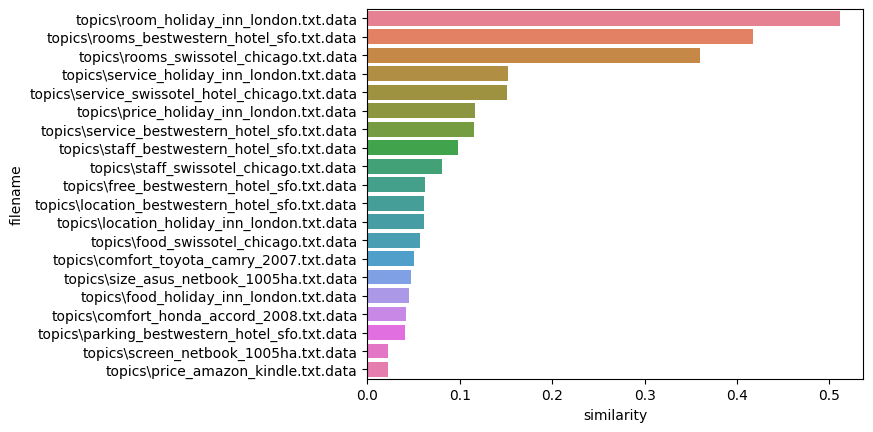

In [15]:
sns.barplot(x='similarity', y='filename', data=result_df.iloc[:20], hue='filename')
plt.show()

C:\Users\maest\AppData\Local\Temp\ipykernel_10484\4182284611.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_sim_df['similarity'] = target_sim_val


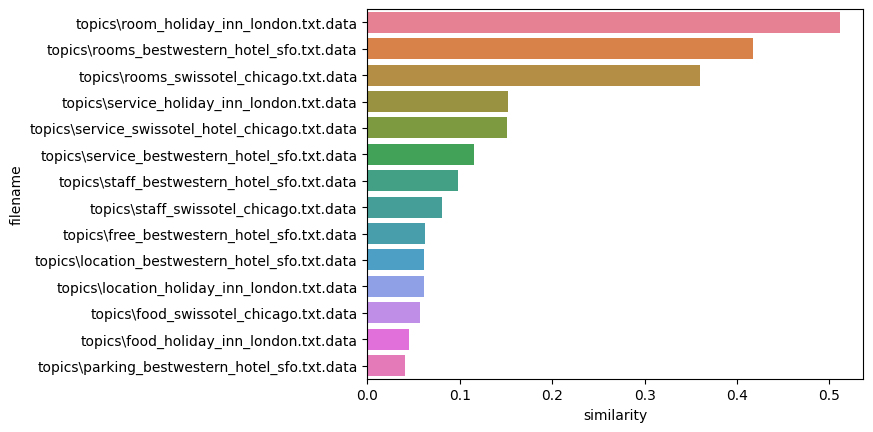

In [ ]:
# 호텔관련 리뷰 추출
hotel_idx = document_df[document_df['cluster'] == 1].index
# print(hotel_idx)

# 기준이 될 문서를 0번째 문서 지정(추출된 호텔 관련 리뷰중)
base_idx = hotel_idx[0]
document_df.iloc[base_idx]

# 호텔 관련 리뷰 중 유사도 높은 순으로 정렬
target_sim = cosine_similarity(opinions_vecs[base_idx], opinions_vecs[hotel_idx])
target_sim_sorted_idx = target_sim.argsort()[:, ::-1]
target_sim_sorted_idx = target_sim_sorted_idx[:, 1:]

hotel_sorted_idx = hotel_idx[target_sim_sorted_idx.reshape(-1)]

target_sim_val = np.sort(target_sim.reshape(-1))[::-1]
target_sim_val = target_sim_val[1:]

hotel_sim_df = document_df.iloc[hotel_sorted_idx]
hotel_sim_df['similarity'] = target_sim_val

sns.barplot(x='similarity', y='filename', data=hotel_sim_df, hue='filename')
plt.show()